# For mission of wood defects recognition using different AF
created by Xiao Wang

# === Library import ===

In [1]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from importlib import reload
import time
print('loading complete')

loading complete


# Data load(open source 7 classes)

loading complete
shape of x_train_oa: (14895, 224, 224, 3)
shape of y_train_oa: (14895, 1, 1, 7)
shape of x_test_oa: (2153, 224, 224, 3)
shape of y_test_oa: (2153, 1, 1, 7)


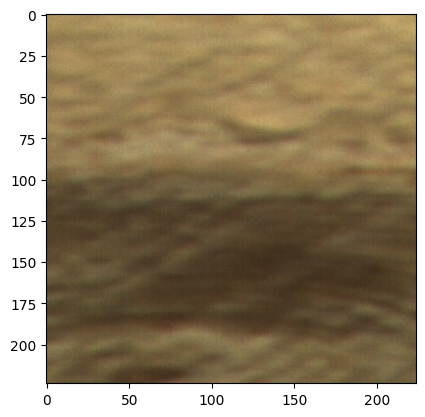

[[[0. 0. 0. 1. 0. 0. 0.]]]


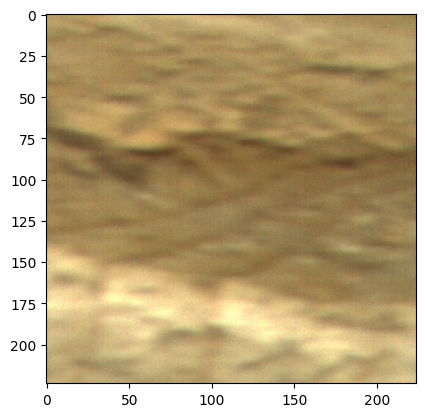

[[[0. 1. 0. 0. 0. 0. 0.]]]


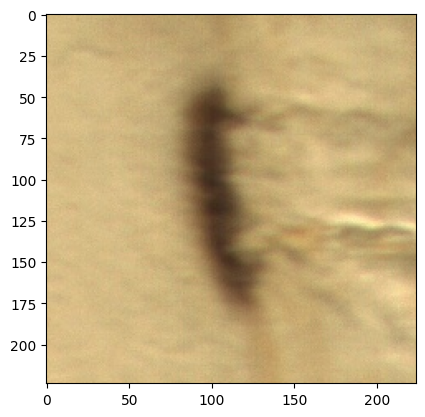

[[[0. 0. 1. 0. 0. 0. 0.]]]


'Tue Feb 17 13:19:47 2026'

In [3]:
Path = './datasets/'
x_train_oa = np.load(Path + 'x_train_oa.npy')
y_train_oa = np.load(Path + 'y_train_oa.npy')
x_test_oa = np.load(Path + 'x_test_oa.npy')
y_test_oa = np.load(Path + 'y_test_oa.npy')
print('loading complete')
print('shape of x_train_oa:', x_train_oa.shape)
print('shape of y_train_oa:', y_train_oa.shape)
print('shape of x_test_oa:', x_test_oa.shape)
print('shape of y_test_oa:', y_test_oa.shape)
for i in range(3):
    plt.imshow(x_train_oa[i], cmap = 'gray') # 显示图片
    plt.show()
    print(y_train_oa[i])
time.asctime()

# Data load(self-built 4 classes)

loading complete
shape of x_train_fb: (1920, 224, 224, 3)
shape of y_train_fb: (1920, 1, 1, 4)
shape of x_test_fb: (96, 224, 224, 3)
shape of y_test_fb: (96, 1, 1, 4)


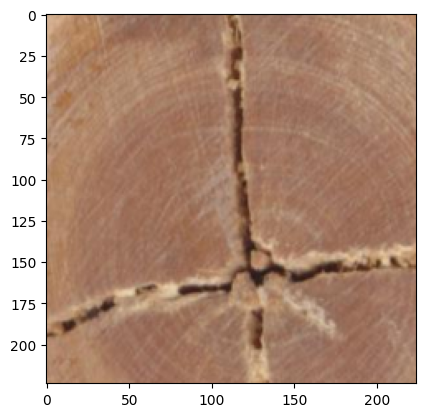

[[[0. 1. 0. 0.]]]


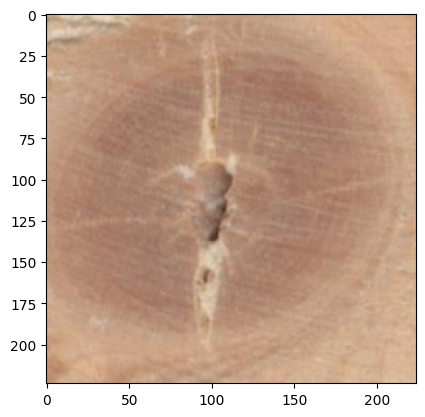

[[[0. 1. 0. 0.]]]


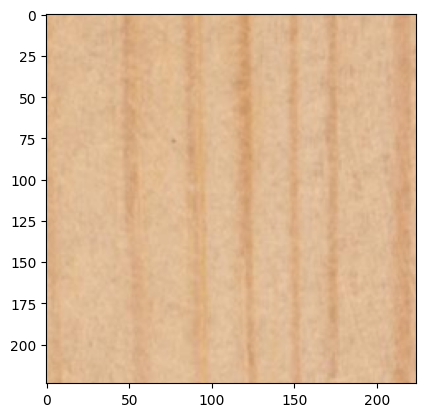

[[[0. 0. 0. 1.]]]


'Tue Feb 17 13:22:34 2026'

In [4]:
Path = './datasets/'
x_train_fb = np.load(Path + 'x_train_fb.npy')
y_train_fb = np.load(Path + 'y_train_fb.npy')
x_test_fb = np.load(Path + 'x_test_fb.npy')
y_test_fb = np.load(Path + 'y_test_fb.npy')
print('loading complete')
print('shape of x_train_fb:', x_train_fb.shape)
print('shape of y_train_fb:', y_train_fb.shape)
print('shape of x_test_fb:', x_test_fb.shape)
print('shape of y_test_fb:', y_test_fb.shape)
for i in range(3):
    plt.imshow(x_train_fb[i], cmap = 'gray') # 显示图片
    plt.show()
    print(y_train_fb[i])
time.asctime()

# Select dataset for model training

In [5]:
# --- select open source data-----
x_train = x_train_oa
y_train = y_train_oa
x_test = x_test_oa
y_test = y_test_oa
# --- select self-built data-----
#x_train = x_train_fb
#y_train = y_train_fb
#x_test = x_test_fb
#y_test = y_test_fb
val = x_train.shape
X_dim = val[3]
Y_dim = y_train.shape[3]
print('val:', val)
print('X_dim:', X_dim)
print('Y_dim:', Y_dim)

val: (14895, 224, 224, 3)
X_dim: 3
Y_dim: 7


# Create model parameters

In [6]:
import Parameters
# ---model parameters creation---
# ScaleNet is default
# Other options: MobileNet, ResNet, GoogleNet
update, X, Y, sig = Parameters.Machine_selected('ScaleNet', val, X_dim, Y_dim, 8)
# ---manual select is also accepted(using follow codes)---
#update, X, Y, sig = Parameters.ScaleNet(val, X_dim, Y_dim, 8)
#update, X, Y, sig = Parameters.MobileNet(val, X_dim, Y_dim, 8)
#update, X, Y, sig = Parameters.ResNet(val, X_dim, Y_dim, 8)
#update, X, Y, sig = Parameters.GoogleNet(val, X_dim, Y_dim, 8)
print('total varibles:', len(update))
print('X:', X)
print('Y:', Y)
print('model type:', sig)
time.asctime()

Tensor("X:0", shape=(None, 224, 224, 3), dtype=float32)
Tensor("Y:0", shape=(None, 1, 1, 7), dtype=float32)
deep1 32
deep4 256
Discriminator layer 1:
convolutional unit data: 864
1
Discriminator layer 1_2:
convolutional unit data: 9216
1
Discriminator layer 2:
convolutional unit data: 18432
1
Discriminator layer 2_2:
convolutional unit data: 36864
1
Discriminator layer 3:
convolutional unit data: 73728
1
Discriminator layer 3_2:
convolutional unit data: 147456
1
Discriminator layer 4:
convolutional unit data: 294912
1
Discriminator layer 4_2:
convolutional unit data: 589824
1
Discriminator layer 5:
convolutional unit data: 3211264
1
Discriminator layer 6:
convolutional unit data: 65536
1
Discriminator layer 7:
convolutional unit data: 1792
1
Discriminator parameter 8:
convolutional unit data: 256
1
Discriminator parameter 8_2:
convolutional unit data: 256
1
Discriminator parameter 9:
convolutional unit data: 512
1
Discriminator parameter 9_2:
convolutional unit data: 512
1
Discriminato

'Tue Feb 17 13:22:57 2026'

# Build model architecture

In [7]:
import Networks
learning_rate = 1 * 1e-4
# ---selection for AF----
# 0-- ReLU
# 1-- Sinusoid
# 2-- Quadratic Unit
# 3-- Mish
# 4-- Cubic Unit
# 5-- Gaussian
# 6-- Taylor
# 7-- SiLU
# 8-- GELU
D_cls, p = Networks.discriminator(sig, X, update, 1, learning_rate, 'Taylor', 'Taylor', 2)
print('D_cls:', D_cls)
L_cls = tf.reduce_mean(tf.reduce_sum(-Y * tf.log(D_cls), reduction_indices = [3]), name = 'L_cls')
print('L_cls:', L_cls)
D_solver = tf.train.AdamOptimizer(learning_rate).minimize(L_cls, var_list = update)
time.asctime()

This is ScaleNet
AF of Conv: Taylor
AF of FC: Taylor
Order of Taylor: 2
learning rate: 0.0001
Number of variables: 21
d: Tensor("add_2:0", shape=(None, 56, 56, 32), dtype=float32)
d: Tensor("add_5:0", shape=(None, 28, 28, 64), dtype=float32)
d: Tensor("add_8:0", shape=(None, 14, 14, 128), dtype=float32)
d: Tensor("add_11:0", shape=(None, 7, 7, 256), dtype=float32)
d: Tensor("add_14:0", shape=(None, 1, 1, 256), dtype=float32)
d: Tensor("add_17:0", shape=(None, 1, 1, 256), dtype=float32)
d0: Tensor("cls0:0", shape=(None, 1, 1, 7), dtype=float32)
D_cls: Tensor("cls0:0", shape=(None, 1, 1, 7), dtype=float32)
L_cls: Tensor("L_cls:0", shape=(), dtype=float32)


'Tue Feb 17 13:23:00 2026'

# Parameters initialization

In [12]:
sess = tf.Session()
saver = tf.train.Saver(max_to_keep = 200)
sess.run(tf.global_variables_initializer())
N = 0
k = 0
print('\033[5;31;47m%s\033[0m '% 'Ready for training!')
time.asctime()

Ready for training! 


'Tue Feb 17 13:34:55 2026'

# Training

In [ ]:
def Acc_computation(x, y, interval):
    rel = tf.argmax(Y, 3)
    pre = tf.argmax(D_cls, 3)
    pre_s = tf.reduce_sum(D_cls * Y, reduction_indices = [3]) # 2023.11.16
    pre_s = tf.reshape(pre_s, [-1, 1])
    correct_prediction = tf.equal(pre, rel) # comparison between pre and real
    Acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # accuracy calculation
    n = x.shape[0]
    #print('n:', n)
    i = 0
    a2 = 0
    while a2 < n:
        a1 = i * interval # start point
        a2 = np.min([a1 + interval, n]) # end point
        X_mb = x[a1:a2]
        y_mb = y[a1:a2]
        #print(X_mb.shape)
        #print(y_mb.shape)
        result = sess.run([Acc, pre, rel, pre_s], feed_dict = {X: X_mb, Y:y_mb}) # discriminator训练
        acc = result[0]
        if i == 0:
            count = acc * (a2 - a1) # number of correct results
            Pre = result[1]
            Rel = result[2]
            Pre_s = result[3]
        if i > 0:
            count = count + acc * (a2 - a1)
            Pre = np.concatenate((Pre, result[1]), 0)
            Rel = np.concatenate((Rel, result[2]), 0)
            Pre_s = np.concatenate((Pre_s, result[3]), 0)
        i = i + 1
        #print('No.', i, 'Interval:', a1, a2, acc[0])
    return count / n, Pre, Rel, Pre_s

def F1_score_computation(x1, x2):
    y_pre = x1
    y_real = x2
    y_pre = y_pre.reshape(y_pre.shape[0])
    y_real = y_real.reshape(y_real.shape[0])
    cm = confusion_matrix(y_real, y_pre)
    y = cm.reshape(1, cm.shape[0], -1)
    cm1 = np.sum(cm, axis = 0) # TP + FP
    cm2 = np.sum(cm, axis = 1) # TP + FN
    dia = np.diagonal(cm)
    F1_mean = np.mean(dia * 2 / (cm1 + cm2))
    return y, F1_mean

# ---Hyper-parameter setting---
mb_size = 109 #
Epoch = 100
##########################
s0 = time.perf_counter()
s1 = time.perf_counter()
inter = int(x_train.shape[0] / mb_size)
num = inter * Epoch
print('Total iterations:', num)
for it in range(num):
    m1 = (N * mb_size) % (val[0])
    m2 = np.min([m1 + mb_size, val[0]])
    a1 = np.arange(m1, m2)
    m3 = 0
    m4 = np.max([m1 + mb_size - val[0], 0])
    a2 = np.arange(m3, m4)
    b1 = a1.tolist()
    b2 = a2.tolist()
    t_idx = b1 + b2
    N = N + 1
    X_mb = x_train[t_idx]
    y_mb = y_train[t_idx]
    print('Interval:', m1, m2)
    result1 = sess.run([D_solver, L_cls], feed_dict = {X: X_mb, Y: y_mb})
    
    t = Acc_computation(x_train, y_train, mb_size) # 144 or 120
    Acc_train = t[0]
    score_train = t[3]
    CM_train = F1_score_computation(t[1], t[2])

    t = Acc_computation(x_test, y_test, 72) #
    Acc_test = t[0]
    score_test = t[3]
    CM_test = F1_score_computation(t[1], t[2])
    
    if N % inter == 0:
        if k == 0:
            r_w1 = np.array([result1[1]]) # Loss
            r_w2 = np.array([Acc_train]) # Acc in train set
            r_w3 = np.array([Acc_test]) # Acc in test set
        if k > 0:
            r_w1 = np.concatenate((r_w1, np.array([result1[1]])), 0)
            r_w2 = np.concatenate((r_w2, np.array([Acc_train])), 0)
            r_w3 = np.concatenate((r_w3, np.array([Acc_test])), 0)
        k = k + 1
    
    if N % inter == 0:
        print('No. ', N)
        print('k. ', k)
        print('Iter: {}'.format(it + 1))
        print('size:', X_mb.shape[0])
        #print('Interval:', m1, m2)
        print('L_cls: ', result1[1])
        print('Acc_train: ', Acc_train)
        print('Acc_test: ', Acc_test)
        print('F1_test: ', CM_test[1])
        if k == 1:
            #saver = tf.train.Saver(max_to_keep = 200)
            #saver.save(sess, trainResultPath + str(k))
            ori = Acc_test
            f1 = CM_test[1]
            peak_num = k
        if k > 1:
            if Acc_test > ori:
                #saver.save(sess, trainResultPath + str(k), write_meta_graph = False)
                #saver.save(sess, trainResultPath + str(k))
                ori = Acc_test
                f1 = CM_test[1]
                peak_num = k
        s2 = time.perf_counter()
        print('Time used:', s2 - s1)
        s1 = time.perf_counter()
s3 = time.perf_counter()
print('Time used(min):', (s3 - s0) / 60)
print('peak_num:', peak_num)
print('Peak acc of test set:', ori)
print('Peak F1 of test set:', f1)

rs = r_w1.shape
axis_x = np.arange(1, rs[0] + 1, 1)

ax = plt.gca()
axis_y = r_w1
plt.plot(axis_x, axis_y)
plt.title('Loss') #
plt.show()
axis_y = r_w2
plt.plot(axis_x[0:200], axis_y[0:200])
plt.title('Acc of train set') #
plt.show()
axis_y = r_w3
plt.plot(axis_x, axis_y)
plt.title('Acc of test set') #
plt.show()
time.asctime()